In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def create_random_network(N, edge_probability=0.5, latency_range=(1, 100)):
    """
    Create a random network graph with N nodes.
    
    Parameters:
    N (int): Number of nodes.
    edge_probability (float): Probability of creating an edge between any two nodes.
    latency_range (tuple): Range of latencies for the edges, default is (1, 100).
    
    Returns:
    G (networkx.Graph): A networkx graph representing the network.
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    # Ensure each node has at least one connection
    for i in range(N):
        if i < N - 1:
            latency = random.randint(latency_range[0], latency_range[1])
            G.add_edge(i, i + 1, latency=latency)
        else:
            latency = random.randint(latency_range[0], latency_range[1])
            G.add_edge(i, 0, latency=latency)  # Connect the last node to the first node to ensure no isolation

    # Add additional random edges
    for i in range(N):
        for j in range(i + 1, N):
            if not G.has_edge(i, j) and random.random() < edge_probability:
                latency = random.randint(latency_range[0], latency_range[1])
                G.add_edge(i, j, latency=latency)
    
    return G

def draw_network(G):
    """
    Draw the network graph with latency labels on the edges.
    
    Parameters:
    G (networkx.Graph): A networkx graph representing the network.
    """
    pos = nx.spring_layout(G)  # positions for all nodes
    edge_labels = nx.get_edge_attributes(G, 'latency')
    
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title("Random Network Graph with Latency Labels")
    plt.show()

In [3]:
# Example usage
N = 10  # Number of nodes
edge_probability = 0.3  # Probability of creating an edge between any two nodes
latency_range = (1, 5)  # Latency range for edges

cellnet = create_random_network(N, edge_probability, latency_range)

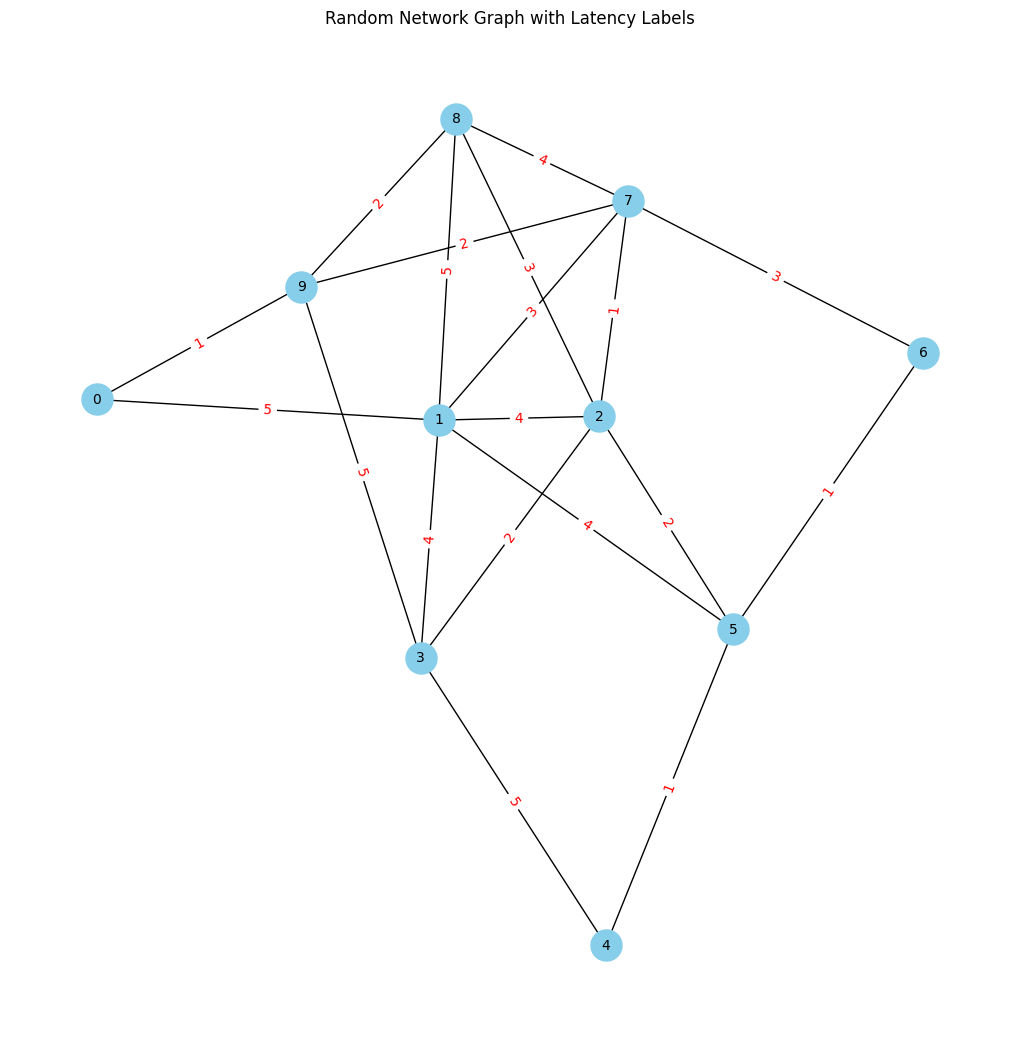

In [4]:
draw_network(cellnet)

In [5]:
def average_latency_on_path(G, start_node, end_node):
    """
    Find the average latency on the path from start_node to end_node.
    
    Parameters:
    G (networkx.Graph): A networkx graph representing the network.
    start_node (int): The start node for the path.
    end_node (int): The end node for the path.
    
    Returns:
    float: The average latency on the path.
    """
    path = nx.dijkstra_path(G, source=start_node, target=end_node, weight='latency')
    total_latency = sum(G[u][v]['latency'] for u, v in zip(path[:-1], path[1:]))
    average_latency = total_latency / (len(path) - 1)
    return average_latency

In [7]:
start_node = 1  # Start node for the path
end_node = 5  # End node for the path

average_latency = average_latency_on_path(cellnet, start_node, end_node)
print("Average latency on the path:", average_latency)

Average latency on the path: 4.0


In [10]:
path = nx.dijkstra_path(cellnet, source=0, target=8, weight='latency')
path

[0, 9, 8]